In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

from matplotlib import pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

## Import Data

In [5]:
df = pd.read_json('cleaned_data.json')
condo_df = df[df['Type'] == 'Condo']
house_df = df[df['Type'] == 'House']
df.head()

,Name,Address,Author,Price,Bedrooms,Showers,Parking,Furnish,Total Developed,Features,...,Nearby Places,URL,Timestamp,City,Region,Island,Type,NFeatures,NFacilities,NNearby Places
0,"3 BR Condo in The Grand Midori Ortigas, Pasig",,"Federal Land, Inc.",29700000,3,3.0,2,0,107.0,"[Ensuite, Range Hood, Stove/Burner]",...,"[School, Hospital]",https://propertyaccess.ph/property/3-br-condo-...,2022-10-23,Pasig,National Capital Region,Luzon,Condo,3,11,2
1,"1 Bedroom Condo in The Grand Midori Ortigas, P...",,"Federal Land, Inc.",10200000,1,1.0,0,0,46.0,[Fiber ready],...,"[School, Hospital]",https://propertyaccess.ph/property/1br-condo-i...,2022-10-23,Pasig,National Capital Region,Luzon,Condo,1,11,2
2,"3 Bedroom Condo in Aurelia Residences, Taguig","McKinley Parkway, Taguig, Metro Manila",Shang Properties,107300000,3,4.0,2,0,242.0,"[Central air conditioning, Balcony, Built-in w...",...,"[School, Hospital, Mall, Transportation hub]",https://propertyaccess.ph/property/3-bedroom-c...,2022-10-23,Taguig,National Capital Region,Luzon,Condo,10,15,4
3,3 Bedroom Condo in Shang Residences at Wack Wa...,"Wack Wack Road, Mandaluyong, Metro Manila",Shang Properties,54500000,3,4.0,3,0,231.0,"[Central air conditioning, Balcony, Built-in w...",...,"[School, Hospital, Mall, Transportation hub]",https://propertyaccess.ph/property/3-bedroom-c...,2022-10-23,Mandaluyong,National Capital Region,Luzon,Condo,9,16,4
4,"2BR Condo in Residences at The Galleon, Pasig",,Ortigas Land,41500000,2,2.0,2,0,109.0,"[Central air conditioning, Balcony, Built-in w...",...,"[School, Hospital, Mall, Transportation hub]",https://propertyaccess.ph/property/2br-condo-i...,2022-10-23,Pasig,National Capital Region,Luzon,Condo,7,14,4


In [6]:
# data to be used for clustering
data = df[['Price', 'Bedrooms', 'Showers', 'Parking', 'Total Developed']]
condo_data = condo_df[['Price', 'Bedrooms', 'Showers', 'Parking', 'Total Developed']]
house_data = house_df[['Price', 'Bedrooms', 'Showers', 'Parking', 'Total Developed']]

## Exploratory Data Analysis

### Condos vs Houses

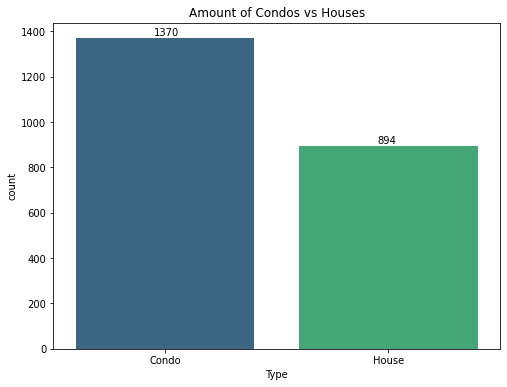

In [30]:
fig, ax= plt.subplots(figsize=(8, 6))
plt.title('Amount of Condos vs Houses')
g = sns.countplot(data=df, x='Type', palette='viridis')
for p in g.patches:
    g.annotate('{}'.format(p.get_height()), (p.get_x()+.35, p.get_height()+10))

Text(0.5, 1.0, 'Price Range of Condos vs Houses')

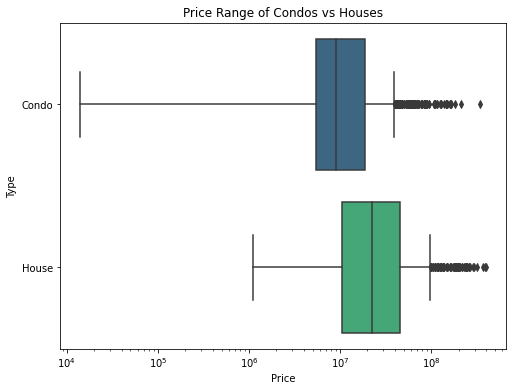

In [31]:
fig, ax= plt.subplots(figsize=(8, 6))
ax.set_xscale('log')
sns.boxplot(data=df, x='Price', y='Type', palette='viridis', ax=ax)
plt.title('Price Range of Condos vs Houses')

Text(0.5, 1.0, 'Total Developed of Condos vs Houses')

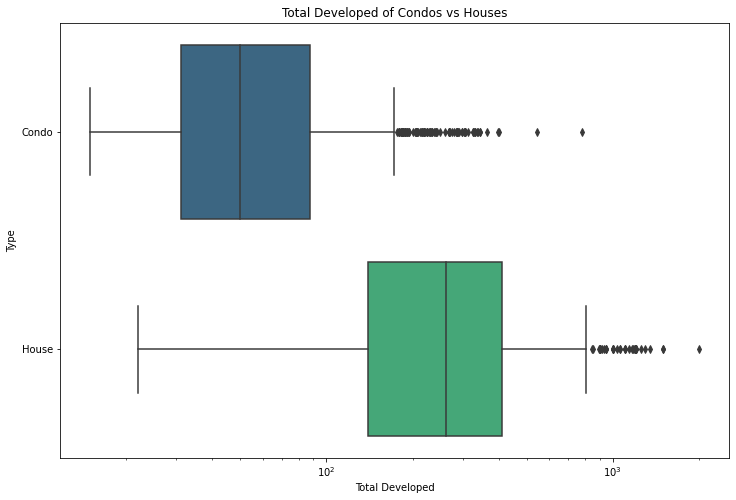

In [6]:
fig, ax= plt.subplots(figsize=(12, 8))
ax.set_xscale('log')
sns.boxplot(data=df, x='Total Developed', y='Type', palette='viridis', ax=ax)
plt.title('Total Developed of Condos vs Houses')

## Gaussian Mixture Model
https://machinelearningmastery.com/clustering-algorithms-with-python/

In [7]:
from matplotlib.patches import Ellipse

def draw_ellipse(gmm, n, ax=None, **kwargs):
    ax = ax or plt.gca()
    covariances = gmm.covariances_[n][:2, :2]
    v, w = np.linalg.eigh(covariances)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ell = Ellipse(gmm.means_[n, :2], v[0], v[1], 180 + angle)
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.5)
    ax.add_artist(ell)
    ax.set_aspect("equal", "datalim")

### Condos

841 7571392.401902497
196 38941190.72448979
1 340000000.0
28 124335982.28571428
304 20347555.86513158


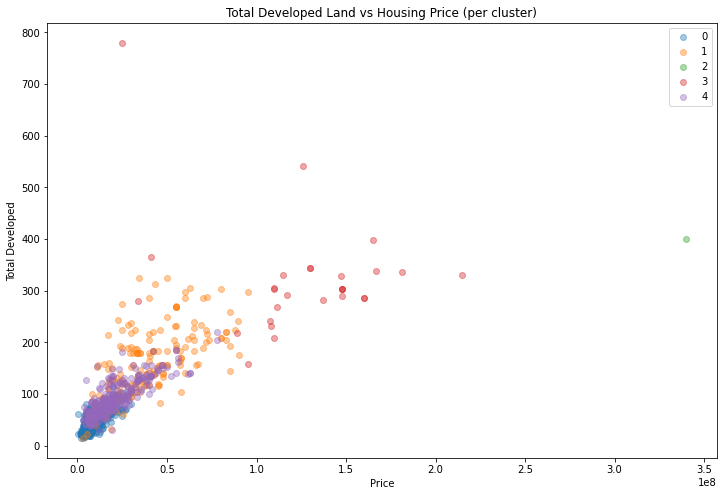

In [70]:
from sklearn.mixture import GaussianMixture
# define the model
model = GaussianMixture(n_components=5, covariance_type='full', random_state=1).fit(condo_data)
# assign a cluster to each example
yhat = model.predict(condo_data)

_ = plt.figure(figsize=(12, 8))
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get rows that exists in each cluster
    row = condo_data[yhat == cluster]
    print(len(row), row['Price'].mean())
    # create scatter of these samples
    ax = plt.scatter(row['Price'], row['Total Developed'], alpha=0.4, zorder=2)
    
plt.title("Total Developed Land vs Housing Price (per cluster)")
plt.xlabel("Price")
plt.ylabel("Total Developed")
plt.legend(clusters)
# show the plot
plt.show()

#### Compare Clusters

Text(0, 0.5, 'Count')

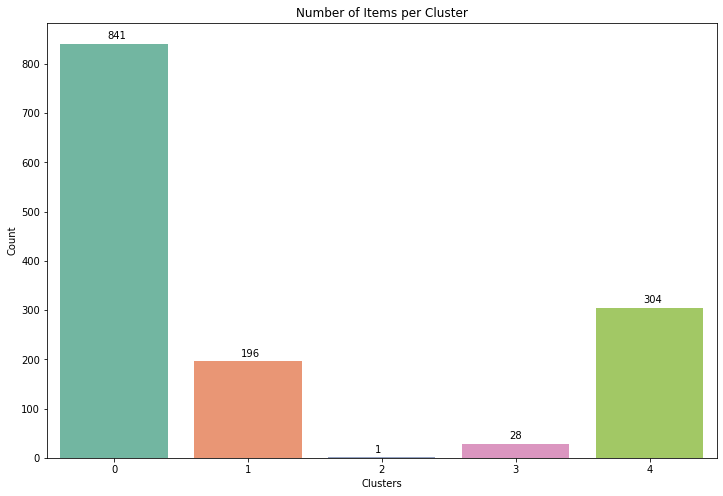

In [71]:
gaussianDF = condo_df.copy()

gaussianDF['Cluster'] = yhat

_ = plt.figure(figsize=(12, 8))

g = sns.countplot(x='Cluster', data=gaussianDF, palette='Set2')
for p in g.patches:
    g.annotate('{}'.format(p.get_height()), (p.get_x()+.35, p.get_height()+10))

plt.title("Number of Items per Cluster")
plt.xlabel("Clusters")
plt.ylabel("Count")

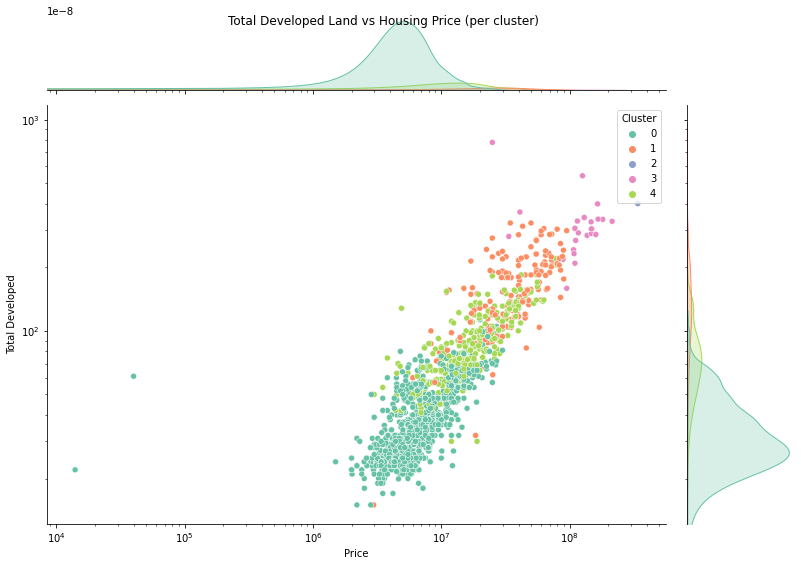

In [72]:
g = sns.jointplot(data=gaussianDF, x="Price", y="Total Developed", hue="Cluster", palette='Set2')

g.fig.suptitle("Total Developed Land vs Housing Price (per cluster)")
g.fig.set_size_inches((12, 8)) 
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')

Text(0.5, 1.0, 'Prices per Cluster')

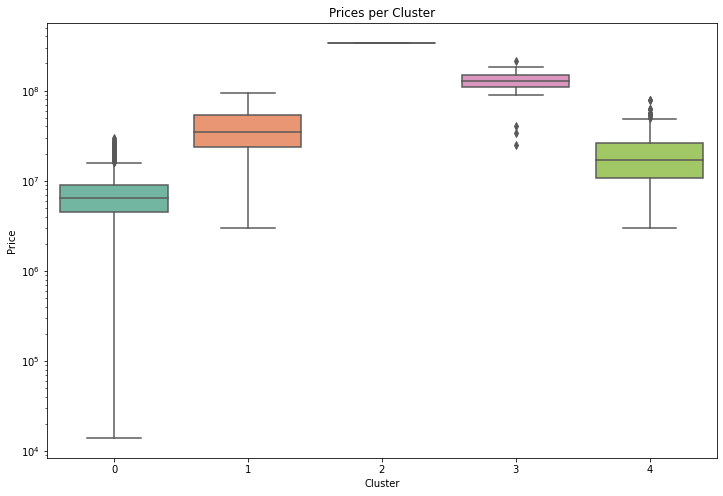

In [73]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_yscale('log')

NameError: name 'gaussianDF' is not defined

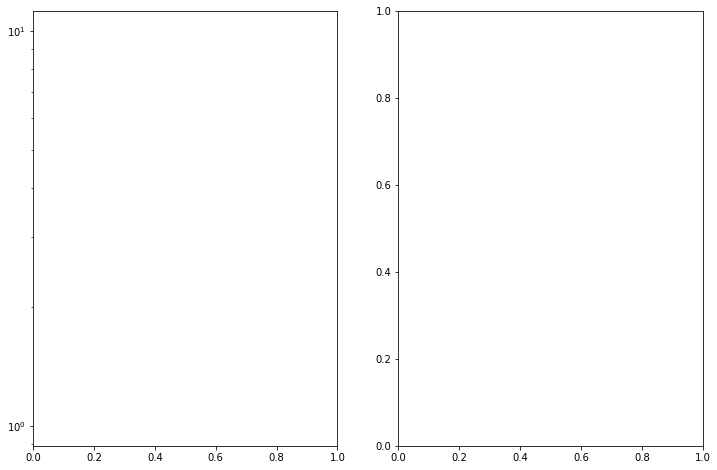

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].set_yscale('log')
sns.boxplot(data=gaussianDF, x='Cluster', y='Total Developed', palette='Set2', ax=ax[0])
plt.title("Total Developed per Cluster")

ax[1].set_yscale('log')
sns.boxplot(data=gaussianDF, x='Cluster', y='Price', palette='Set2', ax=ax[1])
plt.title("Prices per Cluster")

#### Inspecting Outliers

In [75]:
for url in df.loc[gaussianDF[gaussianDF['Cluster'] == 2].index]['URL']:
    print(url)

https://propertyaccess.ph/property/4-bedroom-condo-in-horizon-homes-taguig-byWet5?queryID=ee93d737005634acfbb335300a147cff


#### Where these clusters are

In [76]:
gaussianDF['RegionAbbrev'] = gaussianDF['Region'].apply(lambda x: ''.join([word[:3] for word in x.split(' ')]))

In [77]:
descriptions = ['Lowest-End', 'Middle-End', 'Outlier', 'High-End', 'Low-End']

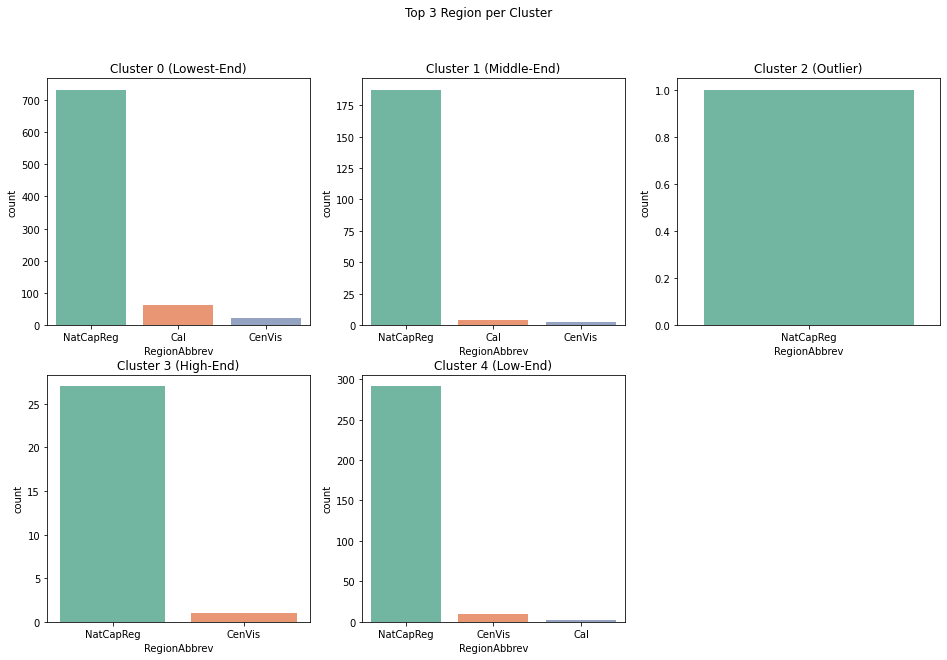

In [78]:
fig = plt.figure(figsize=(16, 10))

fig.suptitle('Top 3 Region per Cluster')

for cluster in clusters:
    fig.add_subplot(2, 3, cluster + 1)
    g = sns.countplot(x='RegionAbbrev', data=gaussianDF[gaussianDF['Cluster'] == cluster], order=gaussianDF[gaussianDF['Cluster'] == cluster]['RegionAbbrev'].value_counts().iloc[:3].index, palette="Set2")
    
    plt.title("Cluster %d (%s)" % (cluster, descriptions[cluster]))

### Houses

199 5932159.718592965
187 89820365.94117647
94 78025585.37234043
6 343550000.0
408 23427118.32352941


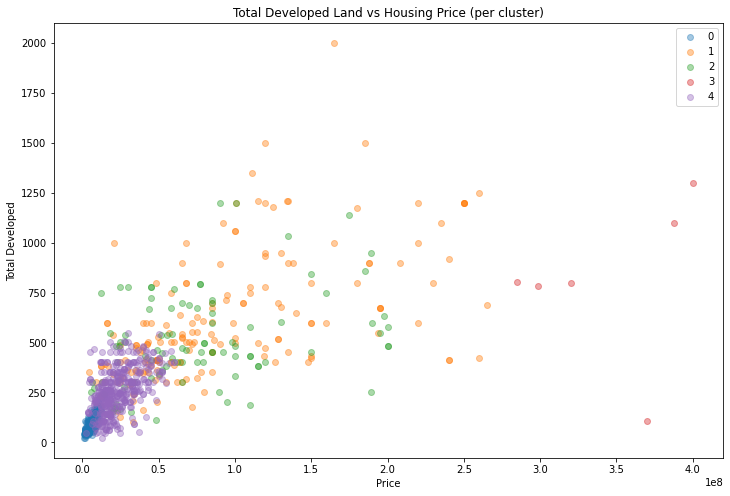

In [48]:
from sklearn.mixture import GaussianMixture
# define the model
model = GaussianMixture(n_components=5, random_state=3)
# fit the model
model.fit(house_data)
# assign a cluster to each example
yhat = model.predict(house_data)

_ = plt.figure(figsize=(12, 8))

# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get rows that exists in each cluster
    row = house_data[yhat == cluster]
    print(len(row), row['Price'].mean())
    # create scatter of these samples
    plt.scatter(row['Price'], row['Total Developed'], alpha=0.4)
    
plt.title("Total Developed Land vs Housing Price (per cluster)")
plt.xlabel("Price")
plt.ylabel("Total Developed")
plt.legend(clusters)
# show the plot
plt.show()

#### Compare Clusters

Text(0, 0.5, 'Count')

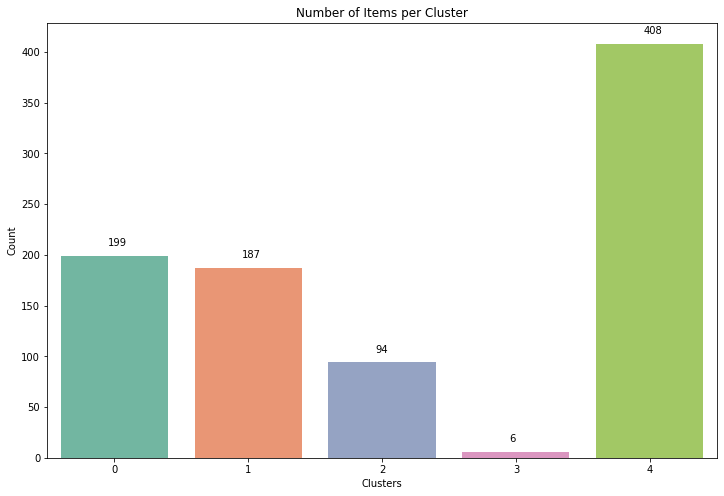

In [49]:
gaussianDF = house_df.copy()

gaussianDF['Cluster'] = yhat

_ = plt.figure(figsize=(12, 8))

g = sns.countplot(x='Cluster', data=gaussianDF, palette="Set2")
for p in g.patches:
    g.annotate('{}'.format(p.get_height()), (p.get_x()+.35, p.get_height()+10))

plt.title("Number of Items per Cluster")
plt.xlabel("Clusters")
plt.ylabel("Count")

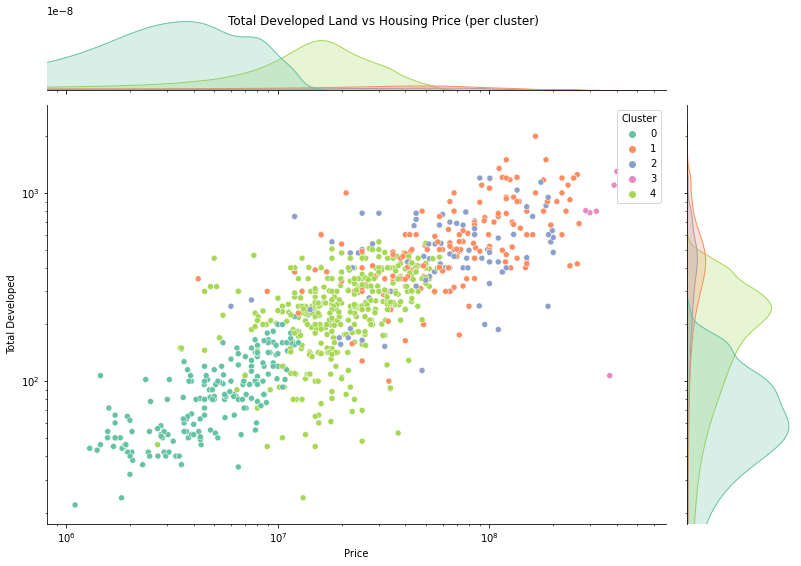

In [64]:
g = sns.jointplot(data=gaussianDF, x="Price", y="Total Developed", hue="Cluster", palette="Set2")

g.fig.suptitle("Total Developed Land vs Housing Price (per cluster)")
g.fig.set_size_inches((12, 8)) 
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')

Text(0.5, 1.0, 'Prices per Cluster')

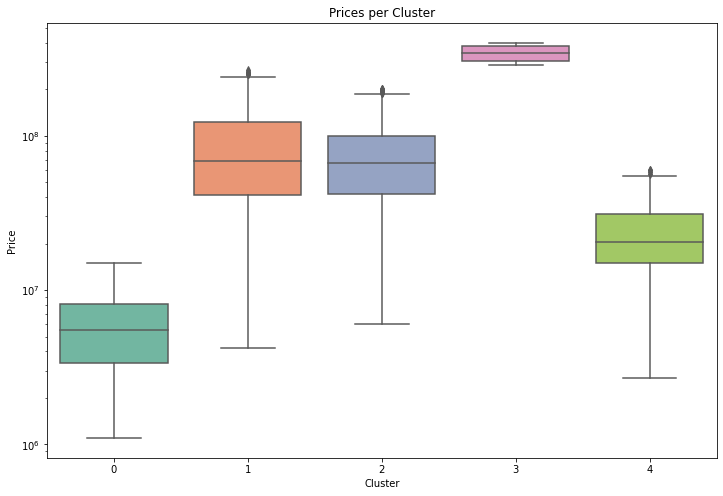

In [51]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_yscale('log')
sns.boxplot(data=gaussianDF, x='Cluster', y='Price', palette='Set2', ax=ax)
plt.title("Prices per Cluster")

Text(0.5, 1.0, 'Total Developed per Cluster')

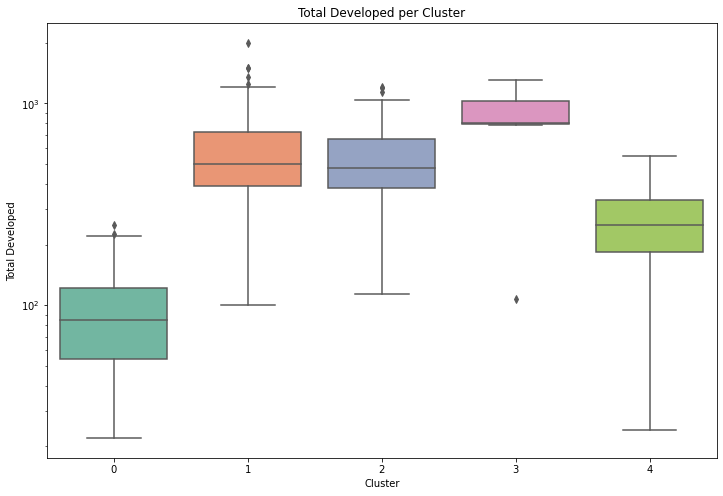

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_yscale('log')
sns.boxplot(data=gaussianDF, x='Cluster', y='Total Developed', palette='Set2', ax=ax)
plt.title("Total Developed per Cluster")

#### Difference between Cluster 1 and 2

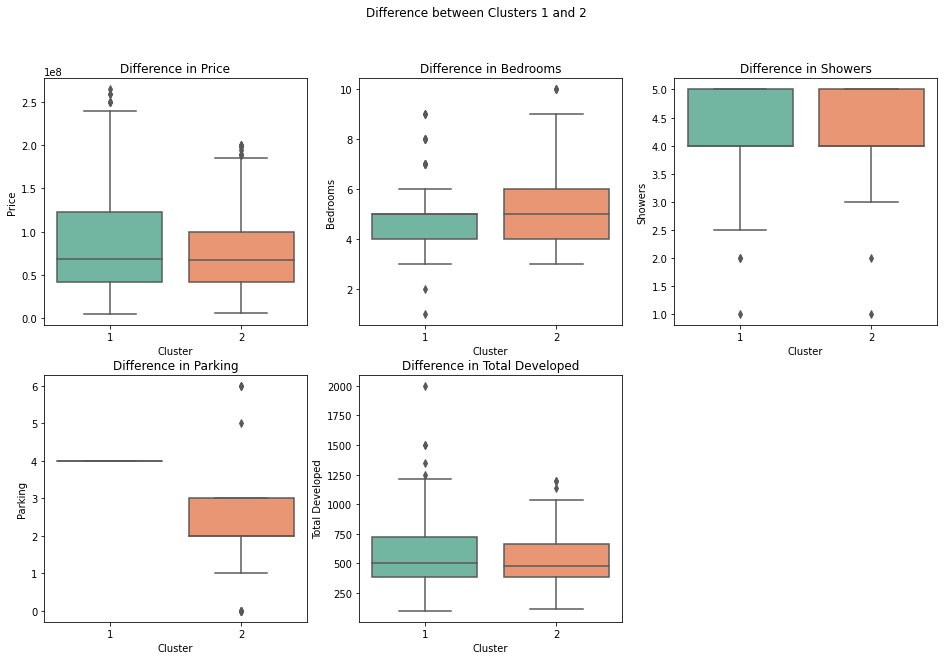

In [60]:
fig = plt.figure(figsize=(16, 10))

fig.suptitle('Difference between Clusters 1 and 2')

for i, column in enumerate(['Price', 'Bedrooms', 'Showers', 'Parking', 'Total Developed']):
    fig.add_subplot(2, 3, i + 1)
    sns.boxplot(data=gaussianDF[(gaussianDF['Cluster'] == 1) | (gaussianDF['Cluster'] == 2)], x='Cluster', y=column, palette="Set2")
    
    plt.title("Difference in %s" % column)

#### Inspecting Outliers

In [54]:
for url in df.loc[gaussianDF[gaussianDF['Cluster'] == 3].index]['URL']:
    print(url)

https://propertyaccess.ph/property/7-bedroom-house-and-lot-muntinlupa-aqhqvo?queryID=451b372a2e5fe7c05ee382a5208531f6
https://propertyaccess.ph/property/residential-lot-malay-ZLWnzm?queryID=f248e4473919aa8b9b21eb5d03506308
https://propertyaccess.ph/property/5-bedroom-house-and-lot-makati-lcHar7?queryID=5102e63d1c19fe2c40541f3610d2d2ed
https://propertyaccess.ph/property/4-bedroom-house-and-lot-san-juan-Fk2VzT?queryID=f00818c1ed86d3d942b307bdb98b404f
https://propertyaccess.ph/property/4-bedroom-house-and-lot-manila-p4JQfH?queryID=2edc1be269a4db5bc46b9dd5c70f9c59
https://propertyaccess.ph/property/house-and-lot-in-green-meadows-quezon-city-33394?queryID=33219363aa16c20ef063d23021c2e9ed


#### Where these clusters are

In [62]:
gaussianDF['RegionAbbrev'] = gaussianDF['Region'].apply(lambda x: ''.join([word[:3] for word in x.split(' ')]))

In [66]:
descriptions = ['Low-End', 'High-End', 'High-End', 'Outlier/Mansion', 'Middle-End']

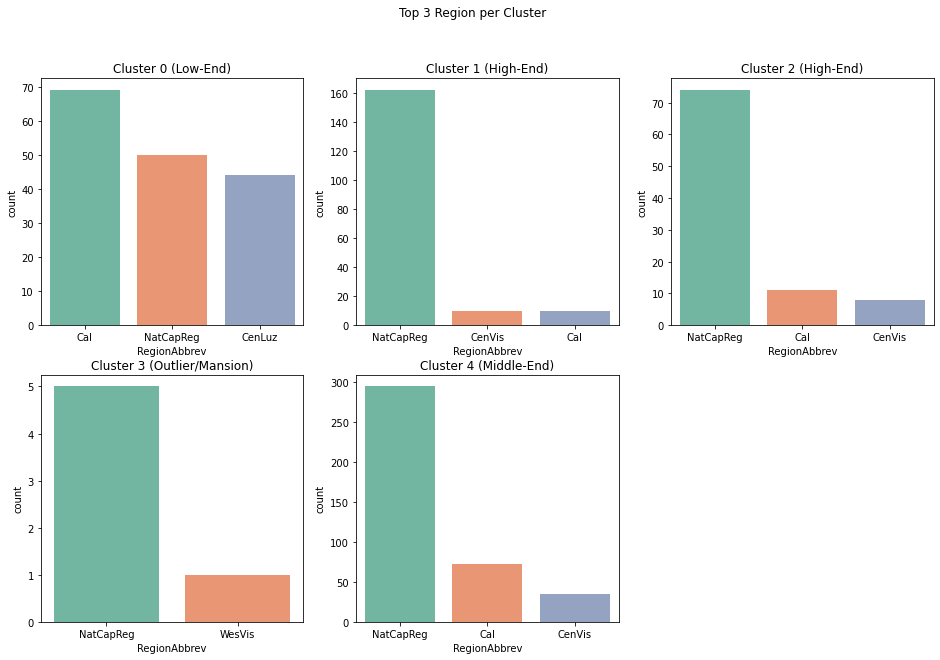

In [67]:
fig = plt.figure(figsize=(16, 10))

fig.suptitle('Top 3 Region per Cluster')

for cluster in clusters:
    fig.add_subplot(2, 3, cluster + 1)
    g = sns.countplot(x='RegionAbbrev', data=gaussianDF[gaussianDF['Cluster'] == cluster], order=gaussianDF[gaussianDF['Cluster'] == cluster]['RegionAbbrev'].value_counts().iloc[:3].index, palette="Set2")
    
    plt.title("Cluster %d (%s)" % (cluster, descriptions[cluster]))

### Combined

890 7299024.513483146
174 104133692.55172414
421 13589488.935866984
88 109864982.17045455
691 30294166.13748191


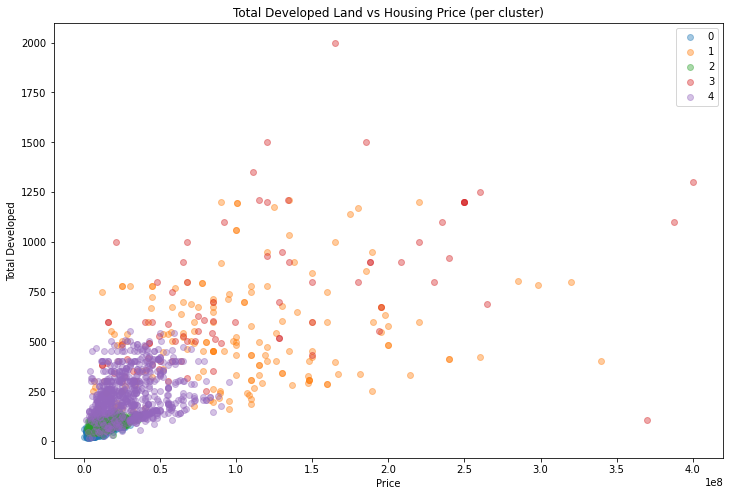

In [79]:
from sklearn.mixture import GaussianMixture
# define the model
model = GaussianMixture(n_components=5, random_state=6)
# fit the model
model.fit(data)
# assign a cluster to each example
yhat = model.predict(data)

_ = plt.figure(figsize=(12, 8))

# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get rows that exists in each cluster
    row = data[yhat == cluster]
    print(len(row), row['Price'].mean())
    # create scatter of these samples
    plt.scatter(row['Price'], row['Total Developed'], alpha=0.4)
    
plt.title("Total Developed Land vs Housing Price (per cluster)")
plt.xlabel("Price")
plt.ylabel("Total Developed")
plt.legend(clusters)
# show the plot
plt.show()

#### Compare Clusters

Text(0, 0.5, 'Count')

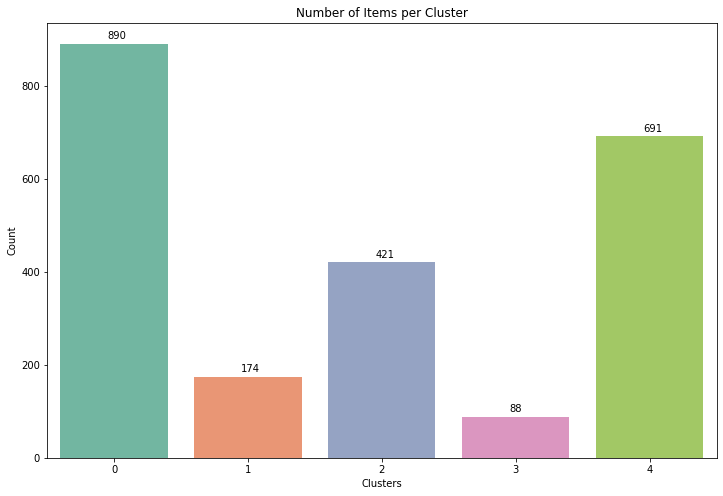

In [84]:
gaussianDF = df.copy()

gaussianDF['Cluster'] = yhat

_ = plt.figure(figsize=(12, 8))

g = sns.countplot(x='Cluster', data=gaussianDF, palette="Set2")
for p in g.patches:
    g.annotate('{}'.format(p.get_height()), (p.get_x()+.35, p.get_height()+10))

plt.title("Number of Items per Cluster")
plt.xlabel("Clusters")
plt.ylabel("Count")

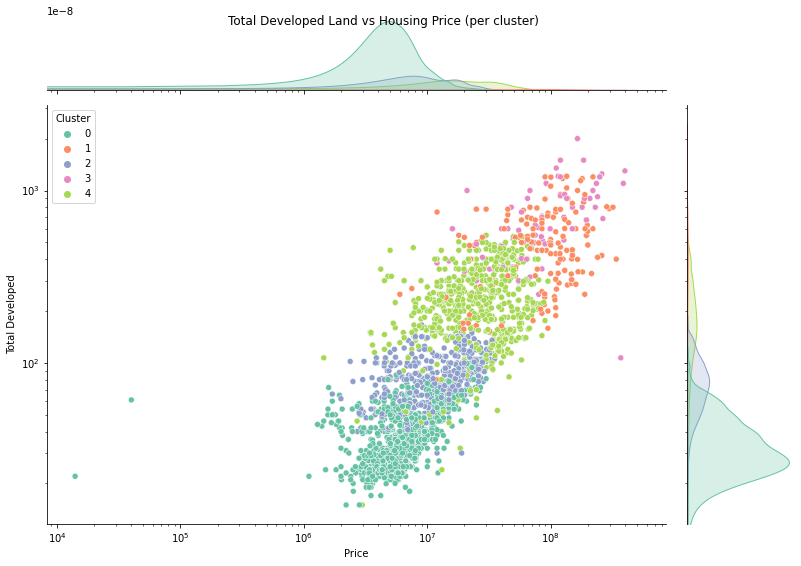

In [85]:
g = sns.jointplot(data=gaussianDF, x="Price", y="Total Developed", hue="Cluster", palette='Set2')

g.fig.suptitle("Total Developed Land vs Housing Price (per cluster)")
g.fig.set_size_inches((12, 8)) 
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')

Text(0.5, 1.0, 'Prices per Cluster')

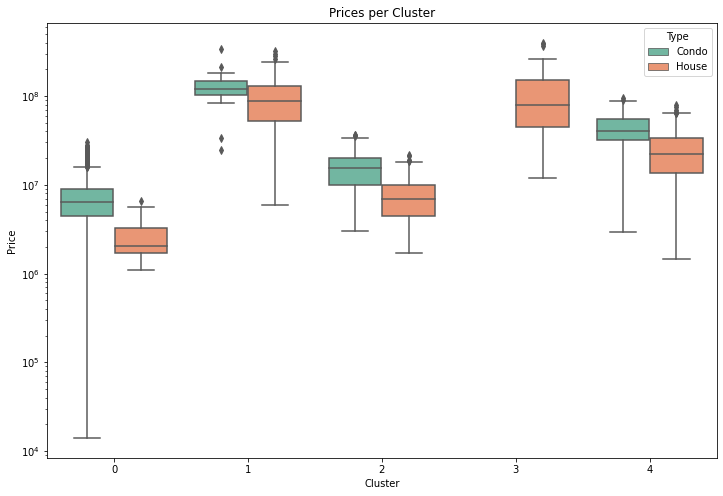

In [86]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_yscale('log')
sns.boxplot(data=gaussianDF, x='Cluster', y='Price', hue='Type', palette='Set2')
plt.title("Prices per Cluster")

Text(0.5, 1.0, 'Total Developed per Cluster')

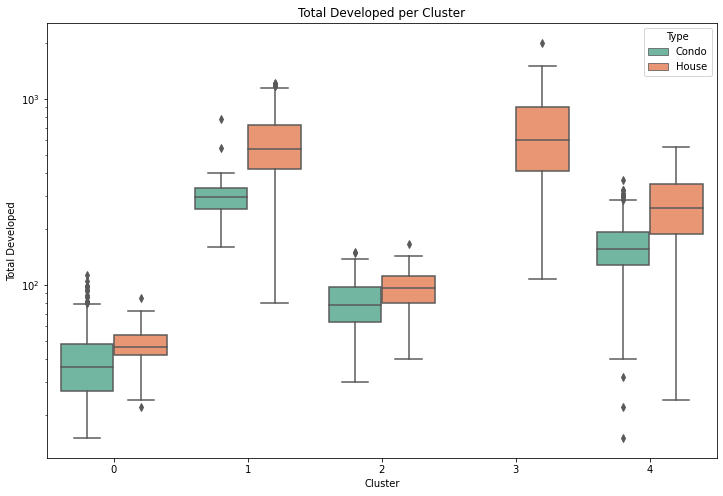

In [87]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_yscale('log')
sns.boxplot(data=gaussianDF, x='Cluster', y='Total Developed', hue='Type', palette='Set2')
plt.title("Total Developed per Cluster")

<AxesSubplot:xlabel='Name', ylabel='Region'>

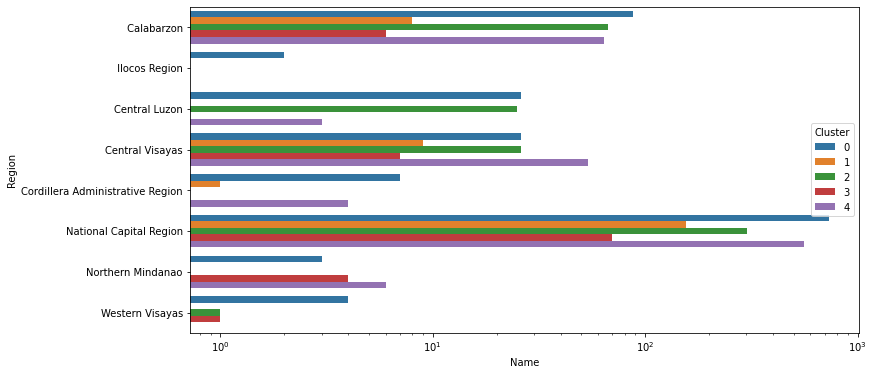

In [89]:
_ = plt.figure(figsize=(12, 6))

sns.barplot(data=gaussianDF.groupby(['Cluster', 'Region']).count()['Name'].reset_index(), x='Name', y='Region', hue='Cluster', log=True)

## k means clustering

In [12]:
scaler = MinMaxScaler()

### Condos

#### Normalized

In [169]:
condo_scaled = condo_data.copy()
condo_scaled[condo_scaled.columns] = scaler.fit_transform(condo_data)
condo_scaled.head()

,Price,Bedrooms,Showers,Parking,Total Developed,cluster,Cluster
0,0.087315,0.4,0.50,0.50,0.120261,0.50,0.50
1,0.029960,0.0,0.00,0.00,0.040523,0.00,0.00
2,0.315560,0.4,0.75,0.50,0.296732,0.75,0.75
3,0.160260,0.4,0.75,0.75,0.282353,0.25,0.25
4,0.122023,0.2,0.25,0.50,0.122876,0.50,0.50


In [170]:
num_clusters = np.arange(2,20)

sum_of_squared_errors = []
silhouette = []
chi = []
dbi = []

for k in num_clusters:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(condo_scaled)
    sum_of_squared_errors.append(km.inertia_)
    
    labels = km.labels_
    silhouette.append(silhouette_score(condo_scaled, labels, metric='euclidean'))
    chi.append(calinski_harabasz_score(condo_scaled, labels))
    dbi.append(davies_bouldin_score(condo_scaled, labels))

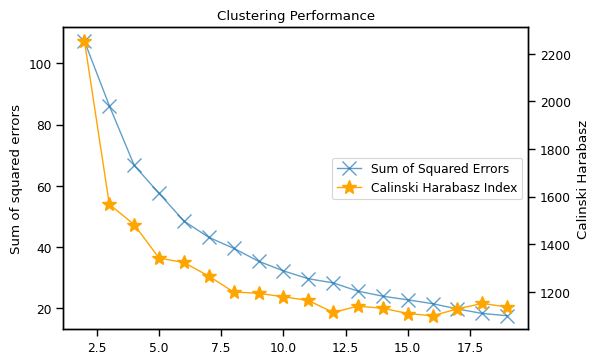

In [171]:
alpha = 0.7
fig, ax = plt.subplots(1,1, dpi=100)
lns1 = ax.plot(num_clusters, sum_of_squared_errors, 'x-', alpha=alpha, label='Sum of Squared Errors')
ax.set_ylabel('Sum of squared errors')

ax2 = ax.twinx()
ax2.set_ylabel('Calinski Harabasz')
ax2.grid(False)
lns2 = ax2.plot(num_clusters, chi, '*-', color='orange', label='Calinski Harabasz Index')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=5)

plt.xlabel('k')
plt.title('Clustering Performance')
plt.show()

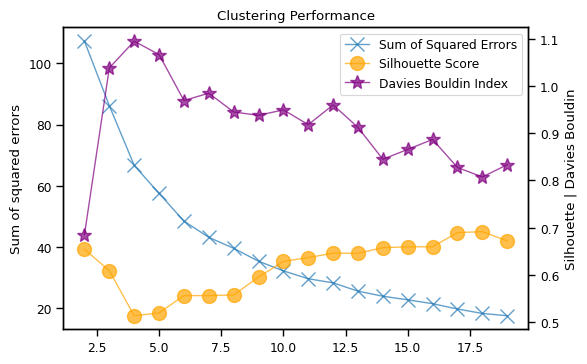

In [172]:
alpha = 0.7
fig, ax = plt.subplots(1,1, dpi=100)
lns1 = ax.plot(num_clusters, sum_of_squared_errors, 'x-', alpha=alpha, label='Sum of Squared Errors')
ax.set_ylabel('Sum of squared errors')

ax2 = ax.twinx()
ax2.set_ylabel('Silhouette | Davies Bouldin')
ax2.grid(False)
lns2 = ax2.plot(num_clusters, silhouette, 'o-', color='orange', alpha=alpha, label='Silhouette Score')
lns3 = ax2.plot(num_clusters, dbi, '*-', color='purple', alpha=alpha, label='Davies Bouldin Index')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

plt.xlabel('k')
plt.title('Clustering Performance')
plt.show()

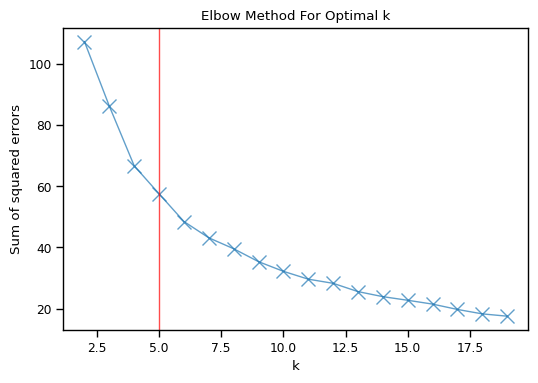

In [173]:
alpha = 0.7
fig, ax = plt.subplots(1,1, dpi=100)
lns1 = ax.plot(num_clusters, sum_of_squared_errors, 'x-', alpha=alpha, label='Sum of Squared Errors')
ax.set_ylabel('Sum of squared errors')

plt.axvline(5, color='red', alpha=alpha)
plt.xlabel('k')
plt.title('Elbow Method For Optimal k')
plt.show()

**Note:** we will use 5 clusters for the condos, houses, and combined

In [174]:
km = KMeans(n_clusters=5, random_state=25)
km = km.fit(condo_scaled)
clusters = km.fit_predict(condo_scaled)
condo_scaled['Cluster'] = clusters

##### Compare Clusters

Text(0, 0.5, 'Count')

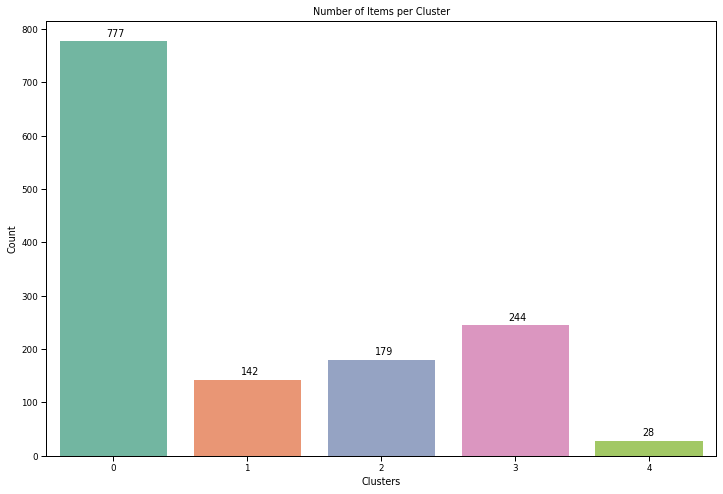

In [175]:
_ = plt.figure(figsize=(12, 8))

g = sns.countplot(x='Cluster', data=condo_scaled, palette="Set2")
for p in g.patches:
    g.annotate('{}'.format(p.get_height()), (p.get_x()+.35, p.get_height()+10))

plt.title("Number of Items per Cluster")
plt.xlabel("Clusters")
plt.ylabel("Count")

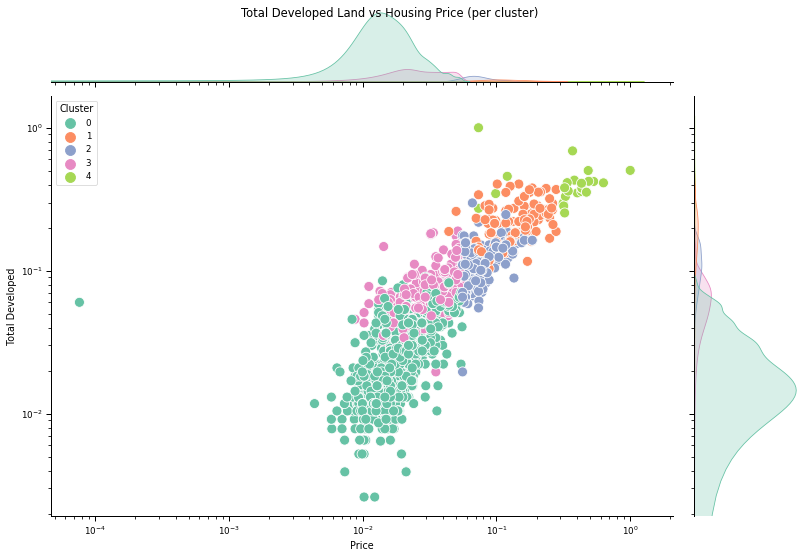

In [176]:
g = sns.jointplot(data=condo_scaled,s=100, x='Price', y='Total Developed', hue='Cluster', palette="Set2")

g.fig.suptitle("Total Developed Land vs Housing Price (per cluster)")
g.fig.set_size_inches((12, 8)) 
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')

C:\users\chris\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Total Developed Land vs Housing Price (per cluster) - Condos'}, xlabel='Price', ylabel='Total Developed'>

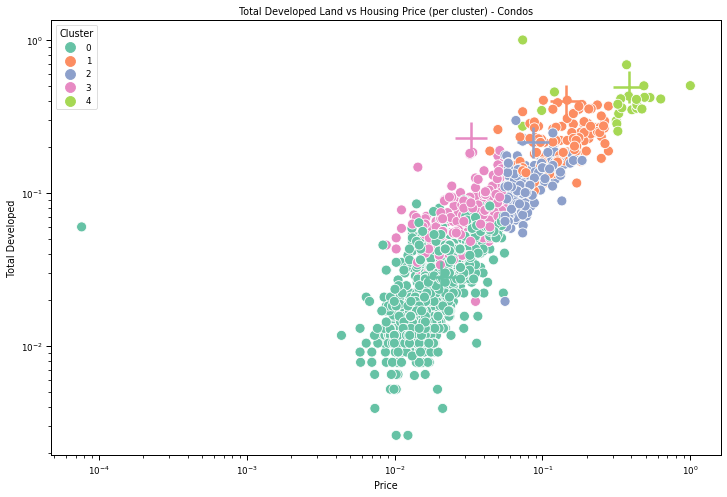

In [180]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set(xscale="log", yscale="log")
sns.scatterplot(data=condo_scaled,s=100, x='Price', y='Total Developed', hue='Cluster', palette="Set2", ax=ax)
plt.title('Total Developed Land vs Housing Price (per cluster) - Condos')

sns.scatterplot(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=1000,hue=range(5), legend=False, marker='+', palette="Set2", ax=ax)

In [178]:
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}                  
sns.set_context("paper", rc = paper_rc)   

Text(0.5, 1.0, 'Price per Cluster')

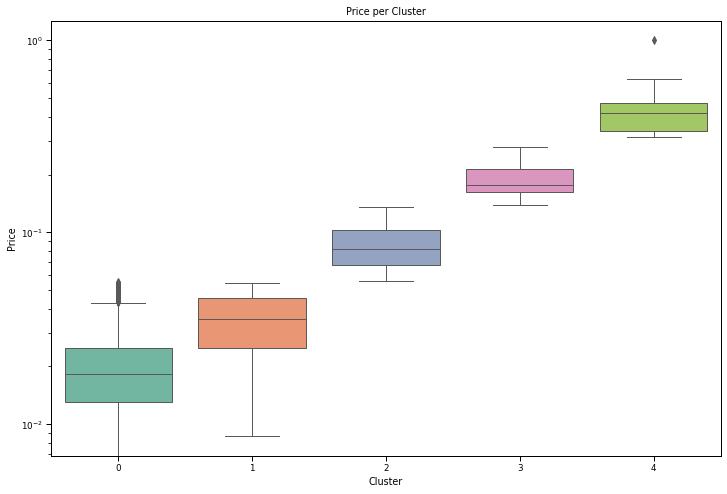

In [152]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_yscale('log')
sns.boxplot(data=condo_scaled, x='Cluster', y='Price', palette='Set2', ax=ax)
plt.title("Price per Cluster")

Text(0.5, 1.0, 'Total Developed per Cluster')

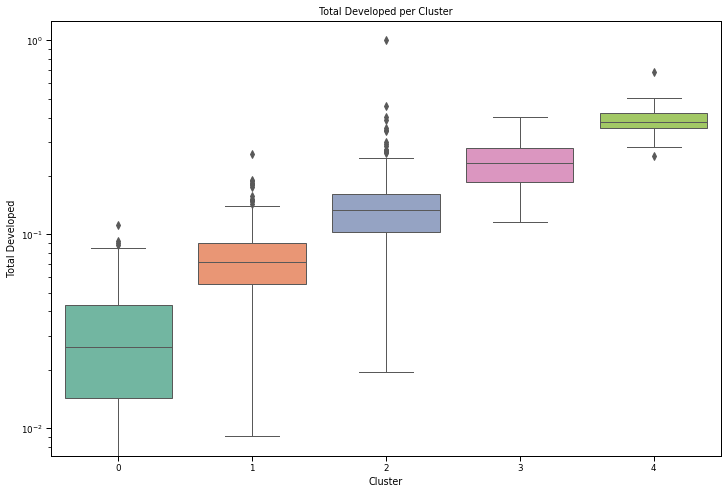

In [151]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_yscale('log')
sns.boxplot(data=condo_scaled, x='Cluster', y='Total Developed', palette='Set2', ax=ax)
plt.title("Total Developed per Cluster")

#### Actual Values

In [181]:
km = KMeans(n_clusters=5, random_state=25)
km = km.fit(condo_data)
clusters = km.fit_predict(condo_data)
condo_data['Cluster'] = clusters

C:\Users\chris\AppData\Local\Temp\ipykernel_25072\879362780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condo_data['Cluster'] = clusters


##### Compare Clusters

Text(0, 0.5, 'Count')

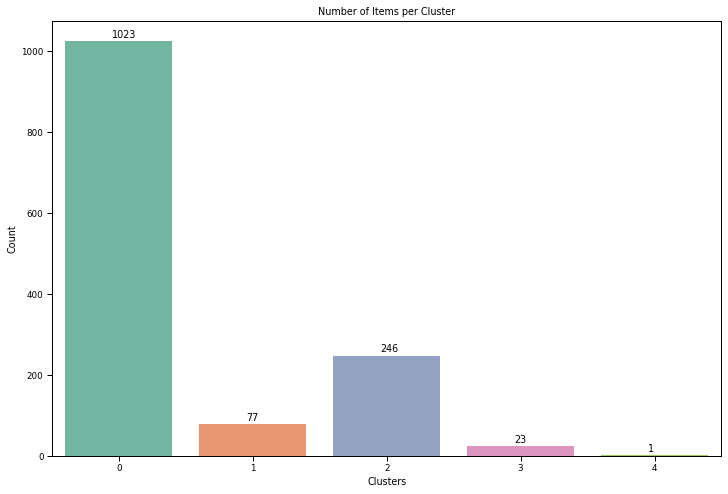

In [182]:
_ = plt.figure(figsize=(12, 8))

g = sns.countplot(x='Cluster', data=condo_data, palette="Set2")
for p in g.patches:
    g.annotate('{}'.format(p.get_height()), (p.get_x()+.35, p.get_height()+10))

plt.title("Number of Items per Cluster")
plt.xlabel("Clusters")
plt.ylabel("Count")

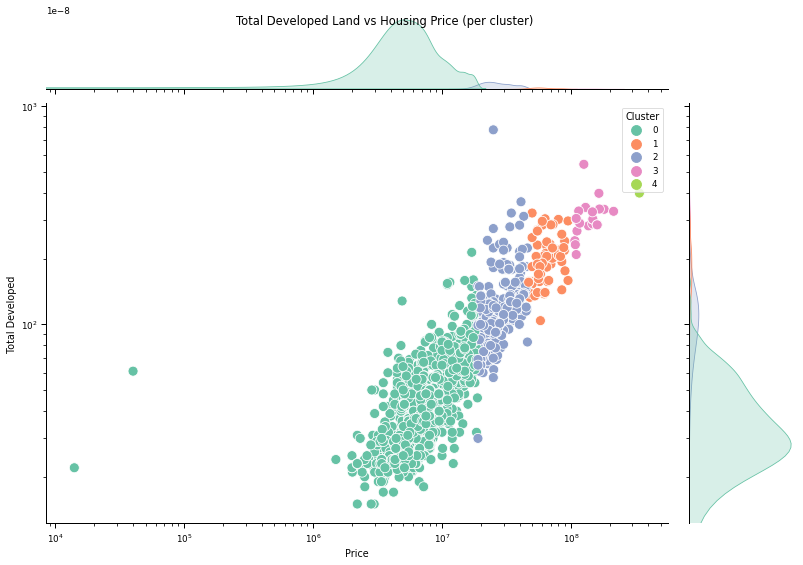

In [183]:
g = sns.jointplot(data=condo_data,s=100, x='Price', y='Total Developed', hue='Cluster', palette="Set2")

g.fig.suptitle("Total Developed Land vs Housing Price (per cluster)")
g.fig.set_size_inches((12, 8)) 
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')

C:\users\chris\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Total Developed Land vs Housing Price (per cluster) - Condos'}, xlabel='Price', ylabel='Total Developed'>

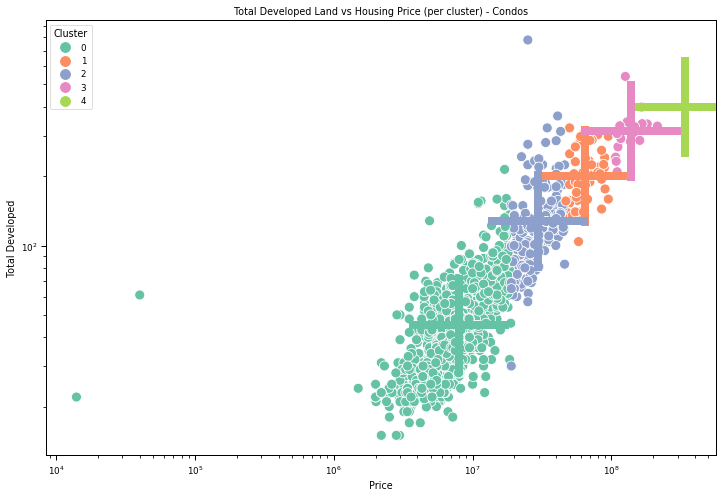

In [189]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set(xscale="log", yscale="log")
sns.scatterplot(data=condo_data,s=100, x='Price', y='Total Developed', hue='Cluster', palette="Set2", ax=ax)
plt.title('Total Developed Land vs Housing Price (per cluster) - Condos')

sns.scatterplot(km.cluster_centers_[:,0],km.cluster_centers_[:,4],s=10000,hue=range(5), legend=False, marker='+', palette="Set2", ax=ax)

Text(0.5, 1.0, 'Price per Cluster')

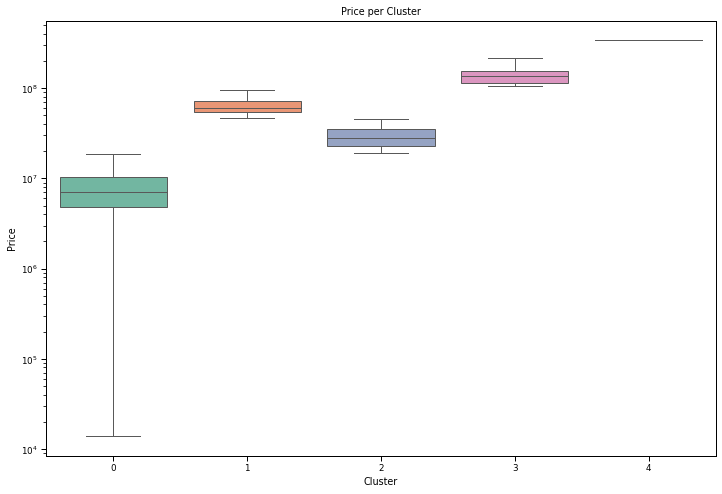

In [221]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_yscale('log')
sns.boxplot(data=condo_data, x='Cluster', y='Price', palette='Set2', ax=ax)
plt.title("Price per Cluster")

Text(0.5, 1.0, 'Total Developed per Cluster')

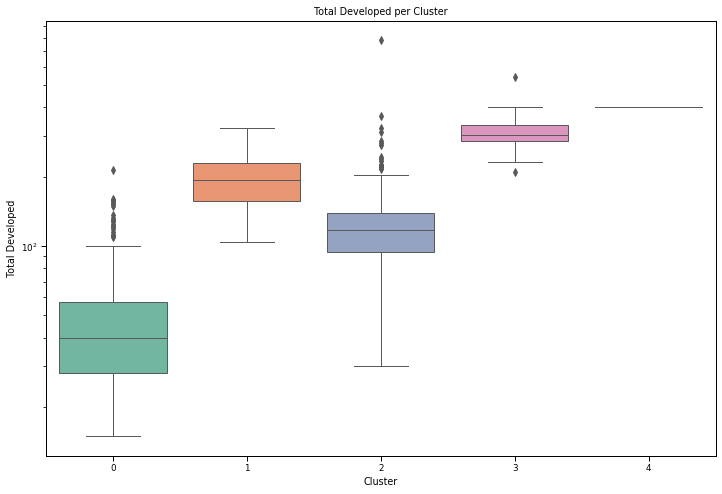

In [222]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_yscale('log')
sns.boxplot(data=condo_data, x='Cluster', y='Total Developed', palette='Set2', ax=ax)
plt.title("Total Developed per Cluster")

### Houses

#### Normalized

In [196]:
house_scaled = house_data.copy()
house_scaled[house_scaled.columns] = scaler.fit_transform(house_data)
house_scaled.head()

,Price,Bedrooms,Showers,Parking,Total Developed
50,0.017298,0.000000,0.00,0.333333,0.067240
53,0.028579,0.444444,0.50,0.333333,0.081901
54,0.043186,0.111111,0.25,0.333333,0.074823
55,0.104490,0.333333,0.75,0.333333,0.122346
58,0.161742,0.333333,0.75,0.333333,0.141557


In [199]:
km = KMeans(n_clusters=5, random_state=25)
km = km.fit(house_scaled)
clusters = km.fit_predict(house_scaled)
house_scaled['Cluster'] = clusters

##### Compare Clusters

Text(0, 0.5, 'Count')

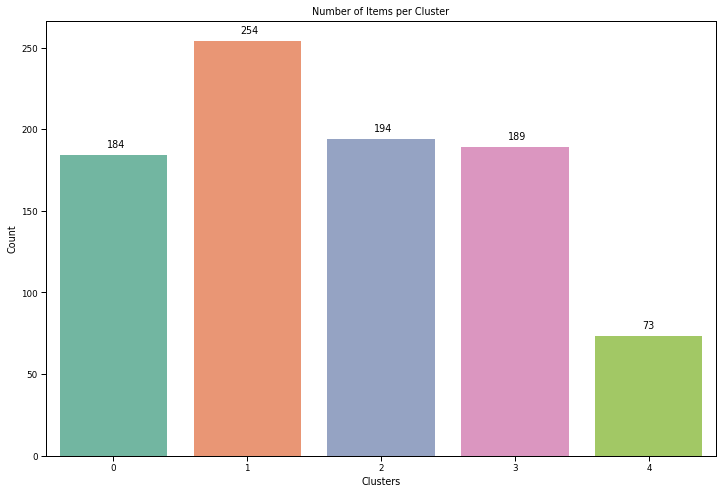

In [201]:
_ = plt.figure(figsize=(12, 8))

g = sns.countplot(x='Cluster', data=house_scaled, palette="Set2")
for p in g.patches:
    g.annotate('{}'.format(p.get_height()), (p.get_x()+.35, p.get_height()+5))

plt.title("Number of Items per Cluster")
plt.xlabel("Clusters")
plt.ylabel("Count")

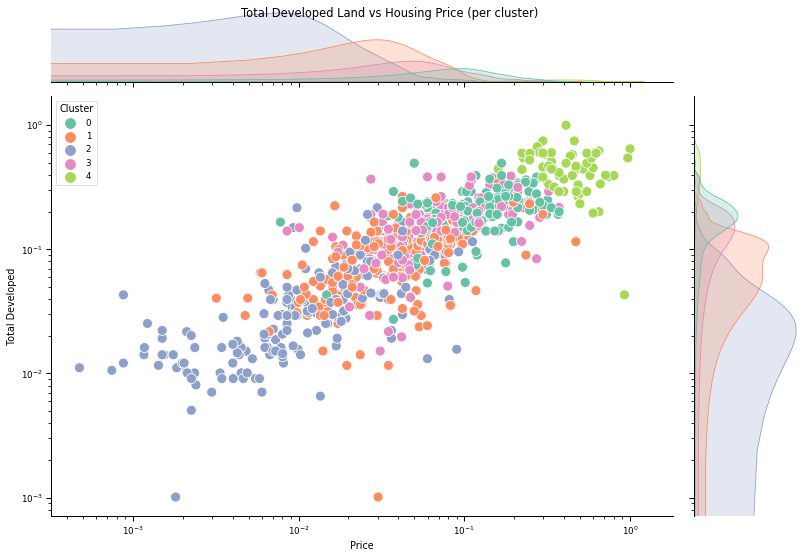

In [202]:
g = sns.jointplot(data=house_scaled,s=100, x='Price', y='Total Developed', hue='Cluster', palette="Set2")

g.fig.suptitle("Total Developed Land vs Housing Price (per cluster)")
g.fig.set_size_inches((12, 8)) 
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')

Text(0.5, 1.0, 'Price per Cluster')

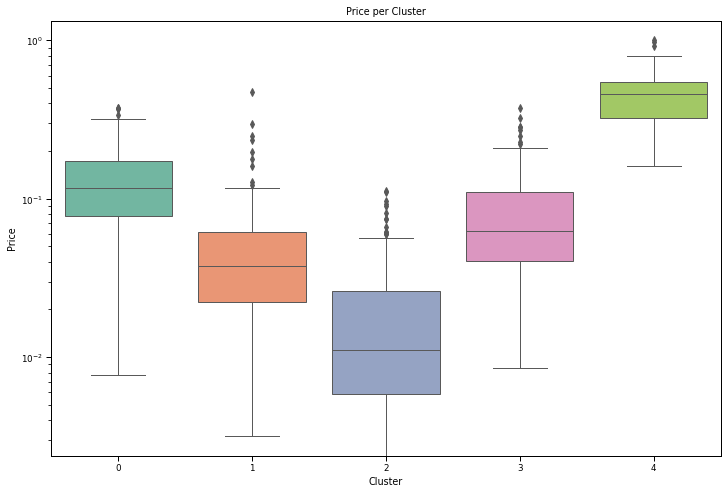

In [203]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_yscale('log')
sns.boxplot(data=house_scaled, x='Cluster', y='Price', palette='Set2', ax=ax)
plt.title("Price per Cluster")

Text(0.5, 1.0, 'Total Developed per Cluster')

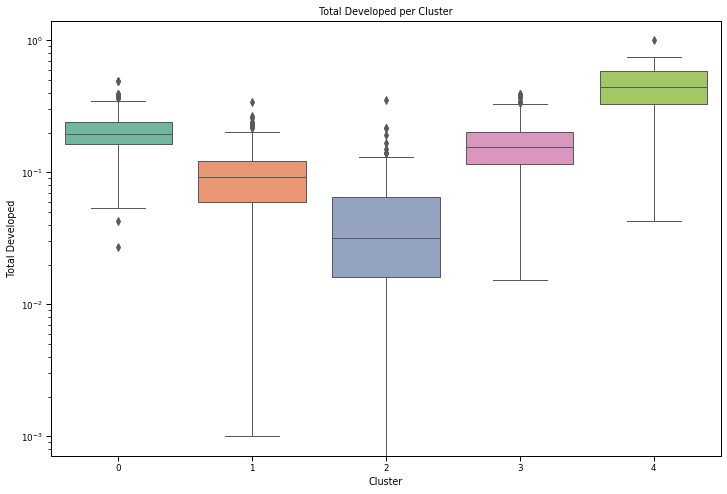

In [204]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_yscale('log')
sns.boxplot(data=house_scaled, x='Cluster', y='Total Developed', palette='Set2', ax=ax)
plt.title("Total Developed per Cluster")

#### Actual values

In [207]:
km = KMeans(n_clusters=5, random_state=25)
km = km.fit(house_data)
clusters = km.fit_predict(house_data)
house_data['Cluster'] = clusters

C:\Users\chris\AppData\Local\Temp\ipykernel_25072\2309860309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data['Cluster'] = clusters


##### Compare Clusters

Text(0, 0.5, 'Count')

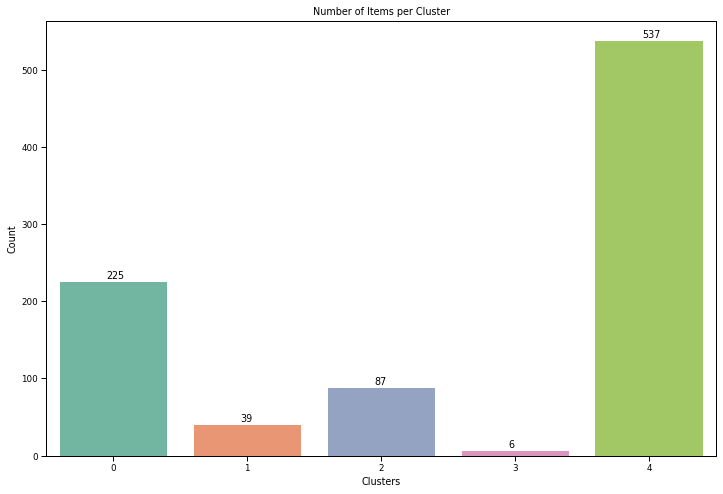

In [208]:
_ = plt.figure(figsize=(12, 8))

g = sns.countplot(x='Cluster', data=house_data, palette="Set2")
for p in g.patches:
    g.annotate('{}'.format(p.get_height()), (p.get_x()+.35, p.get_height()+5))

plt.title("Number of Items per Cluster")
plt.xlabel("Clusters")
plt.ylabel("Count")

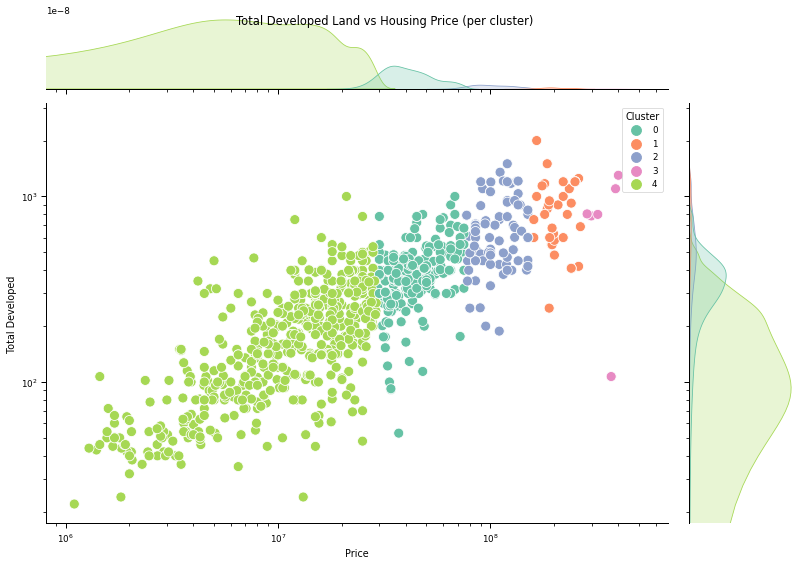

In [209]:
g = sns.jointplot(data=house_data,s=100, x='Price', y='Total Developed', hue='Cluster', palette="Set2")

g.fig.suptitle("Total Developed Land vs Housing Price (per cluster)")
g.fig.set_size_inches((12, 8)) 
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')

Text(0.5, 1.0, 'Price per Cluster')

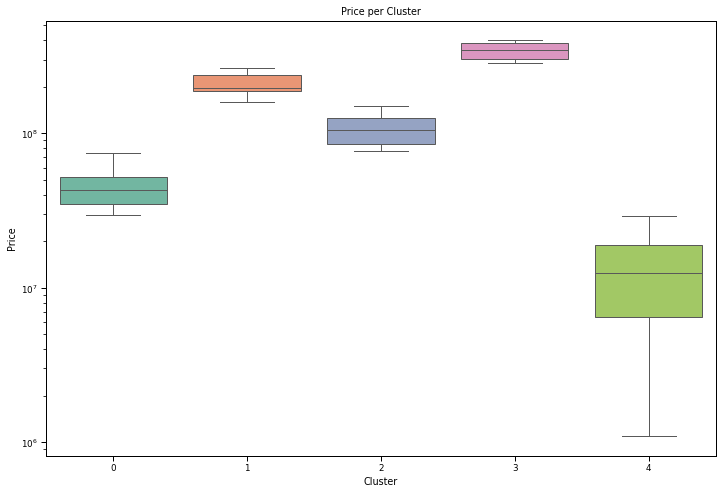

In [210]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_yscale('log')
sns.boxplot(data=house_data, x='Cluster', y='Price', palette='Set2', ax=ax)
plt.title("Price per Cluster")

Text(0.5, 1.0, 'Total Developed per Cluster')

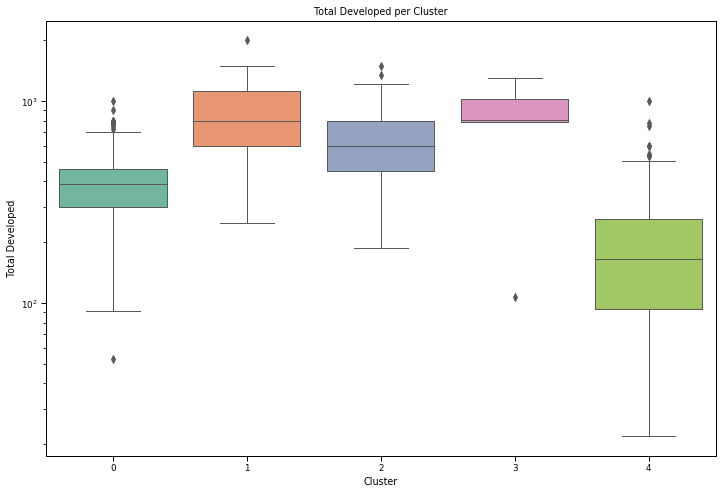

In [211]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_yscale('log')
sns.boxplot(data=house_data, x='Cluster', y='Total Developed', palette='Set2', ax=ax)
plt.title("Total Developed per Cluster")

### Combined

#### Normalized

In [13]:
data_scaled = data.copy()
data_scaled[data_scaled.columns] = scaler.fit_transform(data)

data_scaled.head()

,Price,Bedrooms,Showers,Parking,Total Developed
0,0.074218,0.222222,0.50,0.333333,0.046348
1,0.025466,0.000000,0.00,0.000000,0.015617
2,0.268224,0.222222,0.75,0.333333,0.114358
3,0.136220,0.222222,0.75,0.500000,0.108816
4,0.103719,0.111111,0.25,0.333333,0.047355


In [14]:
data_scaled.describe()

,Price,Bedrooms,Showers,Parking,Total Developed
count,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000
mean,0.067258,0.176580,0.317745,0.200898,0.079071
std,0.101206,0.168817,0.331855,0.210314,0.105300
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.015966,0.000000,0.000000,0.000000,0.013476
50%,0.031826,0.111111,0.250000,0.166667,0.035264
75%,0.074968,0.333333,0.500000,0.333333,0.108312
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
km = KMeans(n_clusters=5, random_state=25)
km = km.fit(data_scaled)
clusters = km.fit_predict(data_scaled)
data_scaled['Cluster'] = clusters
data_scaled['Type'] = df['Type']

##### Compare Clusters

Text(0, 0.5, 'Count')

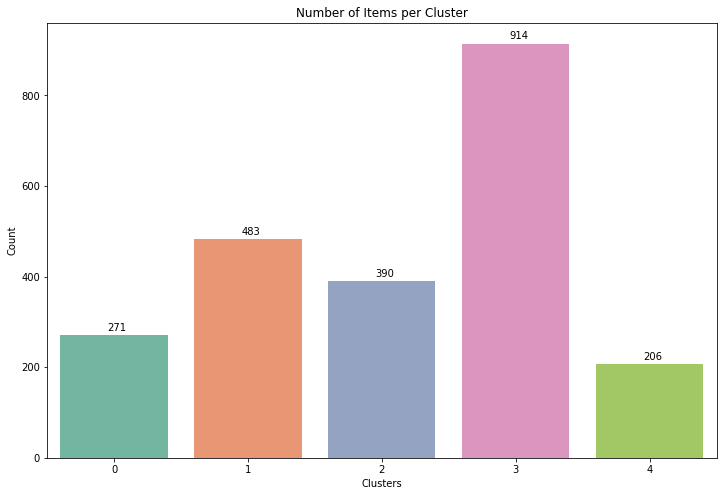

In [16]:
_ = plt.figure(figsize=(12, 8))

g = sns.countplot(x='Cluster', data=data_scaled, palette="Set2")
for p in g.patches:
    g.annotate('{}'.format(p.get_height()), (p.get_x()+.35, p.get_height()+10))

plt.title("Number of Items per Cluster")
plt.xlabel("Clusters")
plt.ylabel("Count")

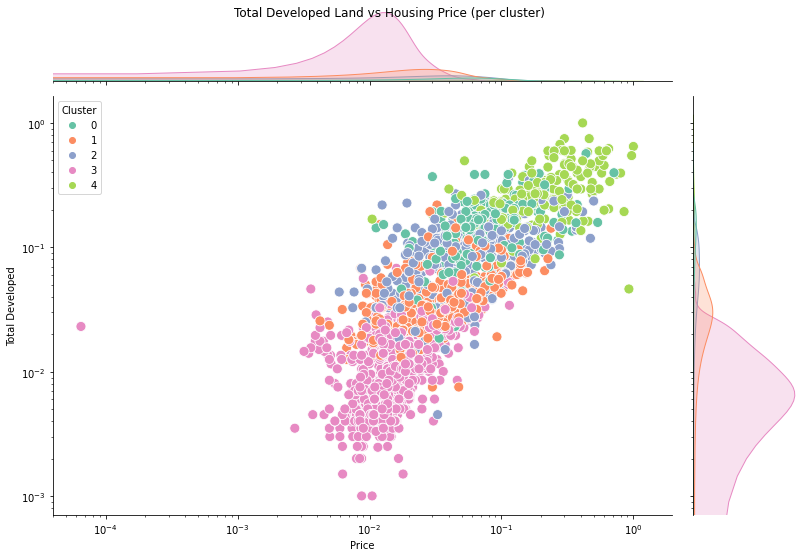

In [17]:
g = sns.jointplot(data=data_scaled,s=100, x='Price', y='Total Developed', hue='Cluster', palette="Set2")

g.fig.suptitle("Total Developed Land vs Housing Price (per cluster)")
g.fig.set_size_inches((12, 8)) 
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')

Text(0.5, 1.0, 'Price per Cluster')

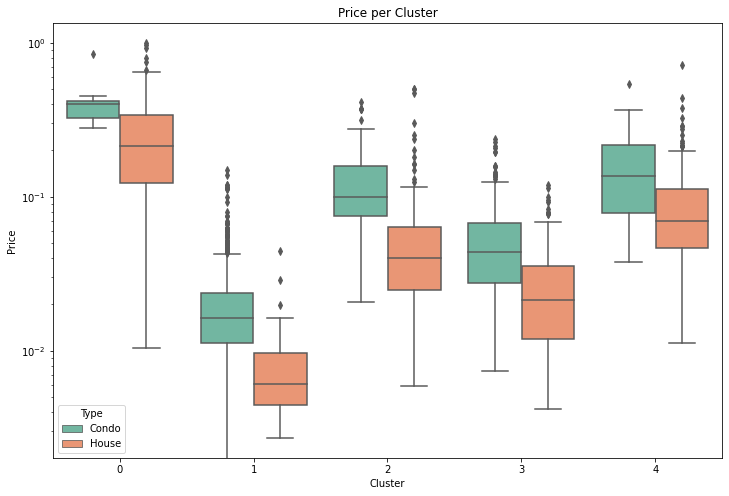

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_yscale('log')
sns.boxplot(data=data_scaled, x='Cluster', y='Price', hue='Type', palette='Set2', ax=ax)
plt.title("Price per Cluster")

Text(0.5, 1.0, 'Total Developed per Cluster')

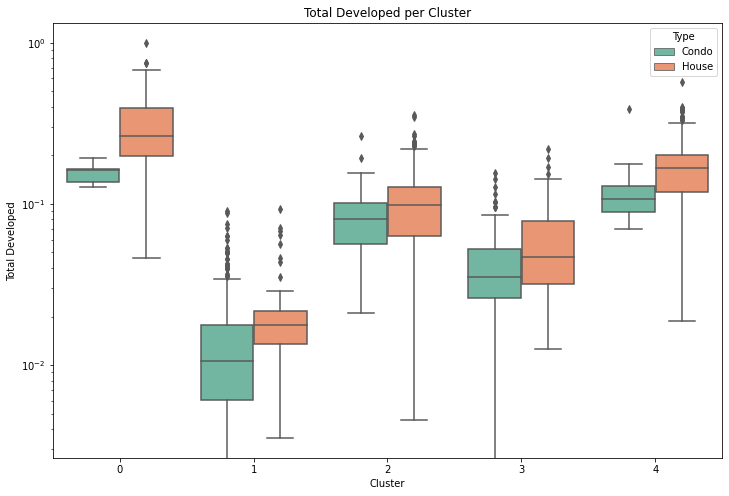

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_yscale('log')
sns.boxplot(data=data_scaled, x='Cluster', y='Total Developed', hue='Type', palette='Set2', ax=ax)
plt.title("Total Developed per Cluster")

#### Actual values

In [23]:
km = KMeans(n_clusters=5, random_state=25)
km = km.fit(data)
clusters = km.fit_predict(data)
data['Cluster'] = clusters
data['Type'] = df['Type']

C:\Users\chris\AppData\Local\Temp\ipykernel_38820\3912664968.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = clusters
C:\Users\chris\AppData\Local\Temp\ipykernel_38820\3912664968.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Type'] = df['Type']


##### Compare Clusters

Text(0, 0.5, 'Count')

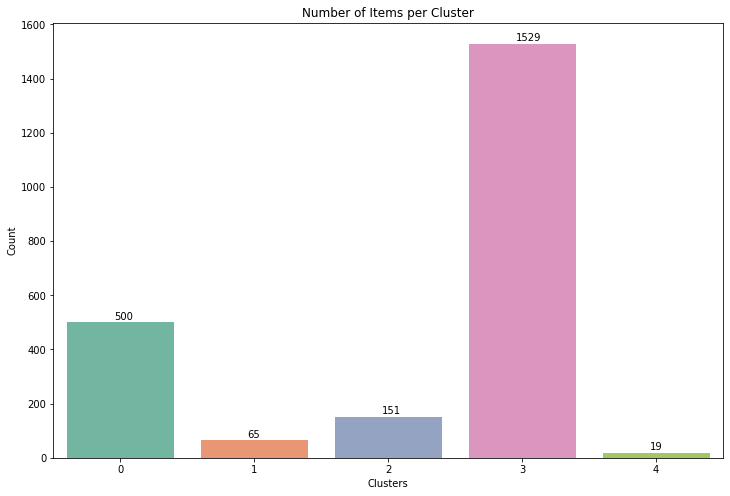

In [24]:
_ = plt.figure(figsize=(12, 8))

g = sns.countplot(x='Cluster', data=data, palette="Set2")
for p in g.patches:
    g.annotate('{}'.format(p.get_height()), (p.get_x()+.35, p.get_height()+10))

plt.title("Number of Items per Cluster")
plt.xlabel("Clusters")
plt.ylabel("Count")

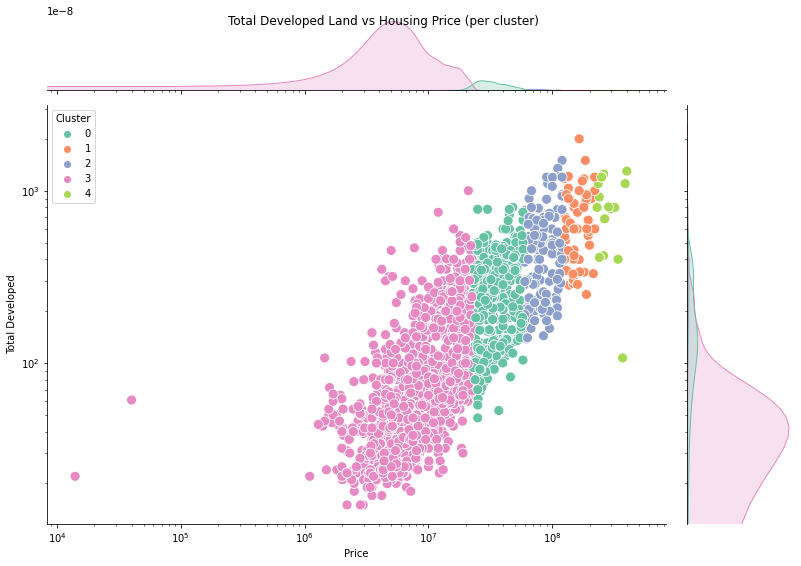

In [29]:
g = sns.jointplot(data=data,s=100, x='Price', y='Total Developed', hue='Cluster', palette="Set2")

g.fig.suptitle("Total Developed Land vs Housing Price (per cluster)")
g.fig.set_size_inches((12, 8)) 
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')

Text(0.5, 1.0, 'Price per Cluster')

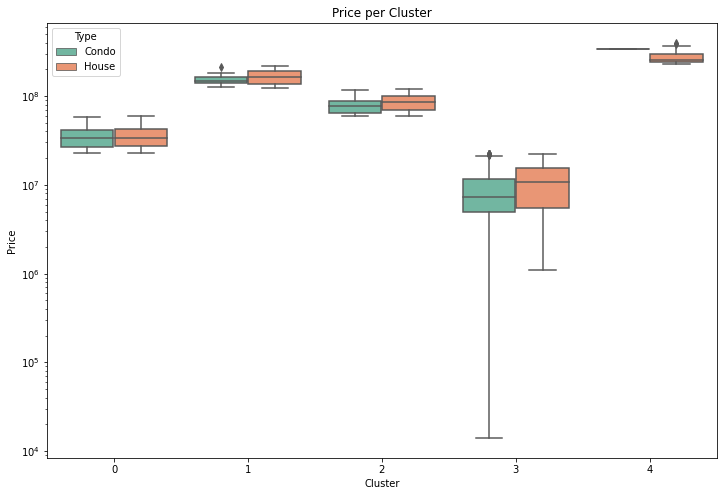

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_yscale('log')
sns.boxplot(data=data, x='Cluster', y='Price', hue='Type', palette='Set2', ax=ax)
plt.title("Price per Cluster")

Text(0.5, 1.0, 'Total Developed per Cluster')

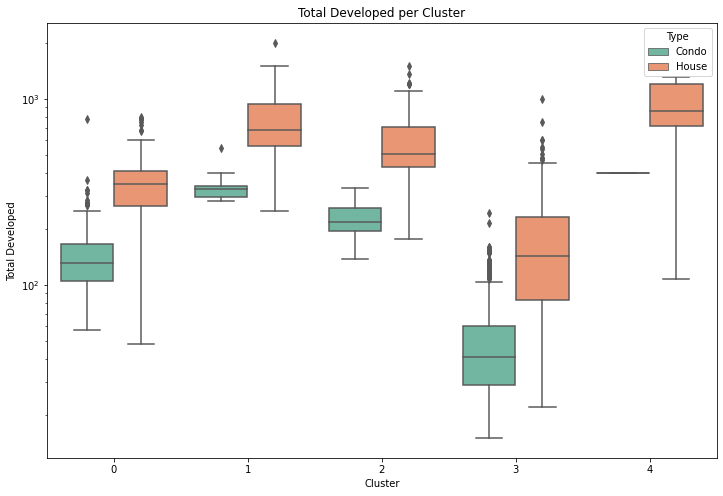

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_yscale('log')
sns.boxplot(data=data, x='Cluster', y='Total Developed', hue='Type', palette='Set2', ax=ax)
plt.title("Total Developed per Cluster")